# Visualisation to explore the relationship between supply, demand and price

In [39]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import pymc3 as pm

In [40]:
gas = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/raw/fuel/supply_demand/uk_gas_demand_cost.csv')
gas_drop_na = gas.dropna()
gas_drop_na.head()

,year,demand,price
0,1993,81848.0,0.009919
1,1994,117606.0,0.009254
2,1995,154393.0,0.008706
3,1996,201969.0,0.008170
4,1997,251822.0,0.008357


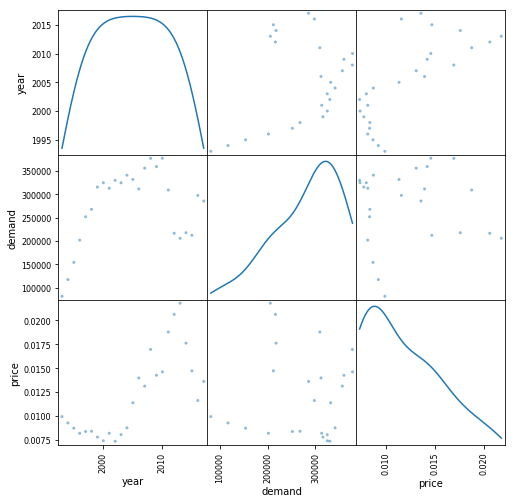

In [3]:
scatter_matrix(gas_drop_na, figsize = (8, 8), diagonal = 'kde')
plt.show()

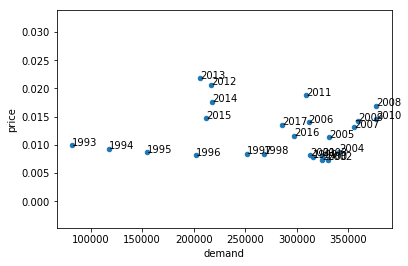

In [4]:
ax = gas_drop_na.plot.scatter(x='demand', y='price')
for i, txt in enumerate(gas_drop_na.year):
    ax.annotate(txt, (gas_drop_na.demand.iat[i],gas_drop_na.price.iat[i]))
plt.show()

# World Gas Demand

In [41]:
world_gas = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/raw/fuel/supply_demand/gas_demand_cost_europe.csv')
world_gas = world_gas[world_gas.year!='Source']
world_gas = world_gas.apply(lambda x: pd.to_numeric(x), axis=1)
world_gas.head()

,year,europe_demand,CIS_demand,northamerica_demand,asia_demand,africa_demand,middle_east,pacific_demand,latam_demand,uk_price
1,1996.0,469.0,704.0,707.0,226.0,46.0,137.0,26.0,107.0,1.866
2,1997.0,466.0,716.0,729.0,246.0,48.0,148.0,26.0,115.0,1.957
3,1998.0,477.0,679.0,713.0,255.0,50.0,157.0,27.0,125.0,1.865
4,1999.0,494.0,651.0,722.0,274.0,55.0,168.0,28.0,126.0,1.579
5,2000.0,508.0,567.0,753.0,286.0,57.0,174.0,29.0,135.0,2.711


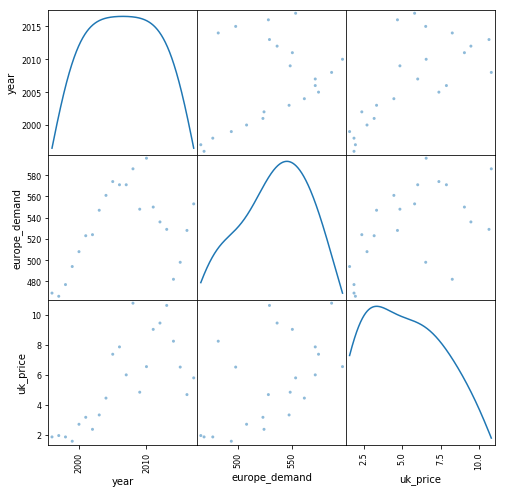

In [6]:
europe_gas = world_gas[['year','europe_demand','uk_price']]
scatter_matrix(europe_gas, figsize = (8, 8), diagonal = 'kde')
plt.show()

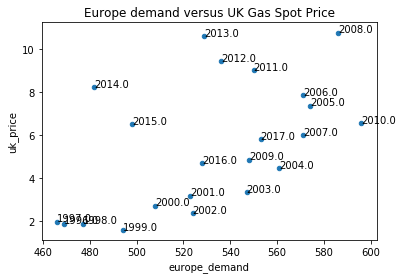

In [7]:
ax = europe_gas.plot.scatter(x='europe_demand', y='uk_price')
for i, txt in enumerate(europe_gas.year):
    ax.annotate(txt, (europe_gas.europe_demand.iat[i],europe_gas.uk_price.iat[i]))
    plt.title('Europe demand versus UK Gas Spot Price')
plt.show()

# World Gas Demand vs UK Gas Prices

In [8]:
world_gas.head()

,year,europe_demand,CIS_demand,northamerica_demand,asia_demand,africa_demand,middle_east,pacific_demand,latam_demand,uk_price
1,1996.0,469.0,704.0,707.0,226.0,46.0,137.0,26.0,107.0,1.866
2,1997.0,466.0,716.0,729.0,246.0,48.0,148.0,26.0,115.0,1.957
3,1998.0,477.0,679.0,713.0,255.0,50.0,157.0,27.0,125.0,1.865
4,1999.0,494.0,651.0,722.0,274.0,55.0,168.0,28.0,126.0,1.579
5,2000.0,508.0,567.0,753.0,286.0,57.0,174.0,29.0,135.0,2.711


In [42]:
world_gas['total_demand'] = world_gas[['europe_demand','CIS_demand','northamerica_demand','asia_demand','africa_demand','middle_east','pacific_demand','latam_demand']].sum(axis=1)
world_gas.head()



,year,europe_demand,CIS_demand,northamerica_demand,asia_demand,africa_demand,middle_east,pacific_demand,latam_demand,uk_price,total_demand
1,1996.0,469.0,704.0,707.0,226.0,46.0,137.0,26.0,107.0,1.866,2422.0
2,1997.0,466.0,716.0,729.0,246.0,48.0,148.0,26.0,115.0,1.957,2494.0
3,1998.0,477.0,679.0,713.0,255.0,50.0,157.0,27.0,125.0,1.865,2483.0
4,1999.0,494.0,651.0,722.0,274.0,55.0,168.0,28.0,126.0,1.579,2518.0
5,2000.0,508.0,567.0,753.0,286.0,57.0,174.0,29.0,135.0,2.711,2509.0


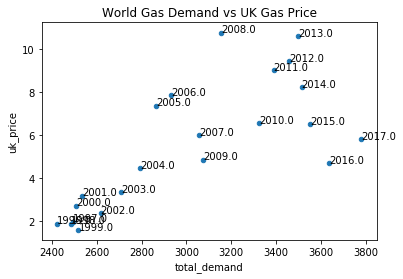

In [10]:
ax = world_gas.plot.scatter(x='total_demand', y='uk_price')
for i, txt in enumerate(world_gas.year):
    ax.annotate(txt, (world_gas.total_demand.iat[i],world_gas.uk_price.iat[i]))
plt.title('World Gas Demand vs UK Gas Price')
plt.show()

## World Gas Price vs Demand and Supply

In [43]:
world_gas_sdp = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/raw/fuel/supply_demand/worldwide_gas_consumption.csv')
world_gas_sdp.head()

,year,demand,production,price
0,units,Billion cubic metres,Billion cubic metres,US dollars per million Btu
1,source,BP Statistical Review of World Energy June 2018,BP Statistical Review of World Energy June 2019,BP Statistical Review of World Energy June 2020
2,1965,630.6370076,NaN,NaN
3,1966,687.1686791,NaN,NaN
4,1967,737.7525476,NaN,NaN


In [44]:
world_gas_sdp = world_gas_sdp[world_gas_sdp.year!='units']
world_gas_sdp = world_gas_sdp[world_gas_sdp.year!='source']
world_gas_sdp.head()

,year,demand,production,price
2,1965,630.6370076,NaN,NaN
3,1966,687.1686791,NaN,NaN
4,1967,737.7525476,NaN,NaN
5,1968,804.6478672,NaN,NaN
6,1969,883.5591838,NaN,NaN


In [45]:
world_gas_sdp_rem_na = world_gas_sdp.dropna()
world_gas_sdp_float = world_gas_sdp_rem_na.apply(lambda x: pd.to_numeric(x), axis=1)
world_gas_sdp_float.head()

,year,demand,production,price
33,1996.0,2214.341796,2191.935703,1.87
34,1997.0,2208.205319,2192.749234,1.96
35,1998.0,2248.593806,2249.683017,1.86
36,1999.0,2310.757158,2314.303907,1.58
37,2000.0,2401.989227,2405.523898,2.71


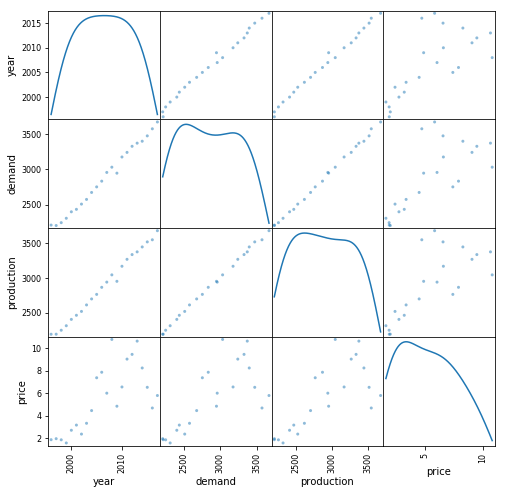

In [14]:
scatter_matrix(world_gas_sdp_float, figsize = (8, 8), diagonal = 'kde')
plt.show()

[  4.58212347e-03  -7.68477768e+00]


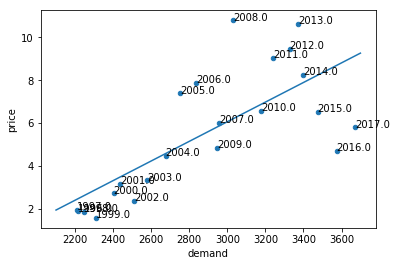

In [15]:
fit = np.polyfit(world_gas_sdp_float.demand, world_gas_sdp_float.price, deg=1)
print(fit)
fit_fn = np.poly1d(fit)
x = range(2100,3700)
y = fit_fn(x)
ax = world_gas_sdp_float.plot.scatter('demand', 'price')
for i, txt in enumerate(world_gas_sdp_float.year):
    ax.annotate(txt, (world_gas_sdp_float.demand.iat[i],world_gas_sdp_float.price.iat[i]))
plt.plot(x,y)
plt.show()

In [16]:
linear_model = ols("price ~ demand", data=world_gas_sdp_float).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     23.12
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           0.000107
Time:                        19:35:13   Log-Likelihood:                -46.250
No. Observations:                  22   AIC:                             96.50
Df Residuals:                      20   BIC:                             98.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.6848      2.779     -2.765      0.0

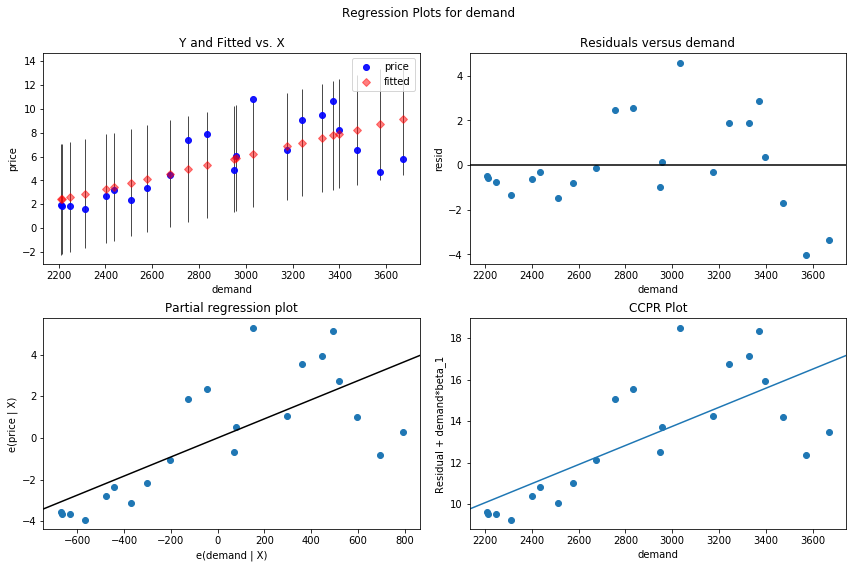

In [17]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(linear_model, 1, fig=fig)
plt.show()


Seems like there is autocorrelation between years. Maybe we can remove this autocorrelation through the inclusion of lags of demand.

## Reducing autocorrelation through 1 lag period difference

In [18]:
world_gas_demand_diff = world_gas_sdp_float.copy()
world_gas_demand_diff['demand_diff'] = world_gas_demand_diff['demand'].diff()
world_gas_demand_diff = world_gas_demand_diff.dropna()
world_gas_demand_diff.head()

,year,demand,production,price,demand_diff
34,1997.0,2208.205319,2192.749234,1.96,-6.136477
35,1998.0,2248.593806,2249.683017,1.86,40.388487
36,1999.0,2310.757158,2314.303907,1.58,62.163352
37,2000.0,2401.989227,2405.523898,2.71,91.232069
38,2001.0,2436.711133,2464.455142,3.17,34.721906


In [19]:
linear_model = ols("price ~ demand_diff + year", data=world_gas_demand_diff).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     7.993
Date:                Sat, 15 Dec 2018   Prob (F-statistic):            0.00328
Time:                        19:35:16   Log-Likelihood:                -45.217
No. Observations:                  21   AIC:                             96.43
Df Residuals:                      18   BIC:                             99.57
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -639.3448    165.891     -3.854      

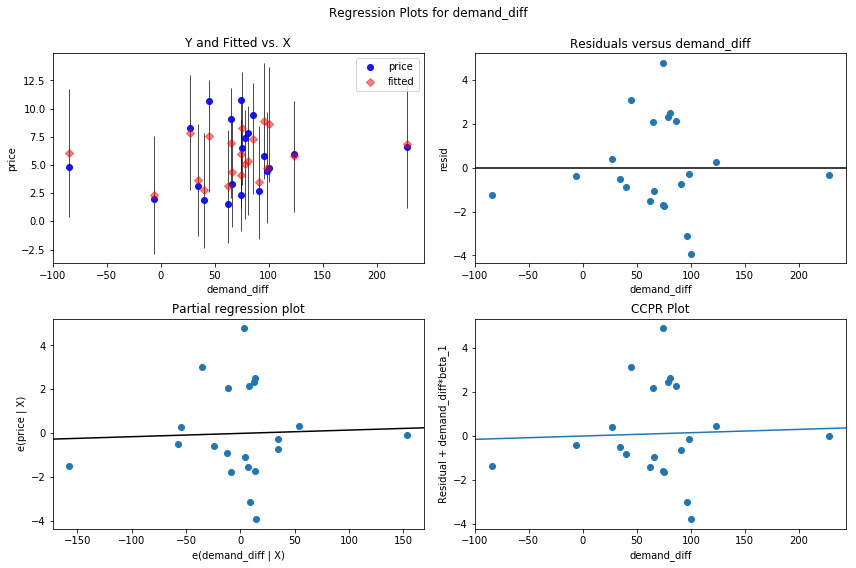

In [20]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(linear_model, 1, fig=fig)
plt.show()

## Reducing autocorrelation by introducing 2 period lag

In [21]:
world_gas_demand_diff2 = world_gas_sdp_float.copy()
world_gas_demand_diff2['demand_diff'] = world_gas_demand_diff2['demand'].diff(periods = 2)
world_gas_demand_diff2 = world_gas_demand_diff2.dropna()
world_gas_demand_diff2.head()

,year,demand,production,price,demand_diff
35,1998.0,2248.593806,2249.683017,1.86,34.252010
36,1999.0,2310.757158,2314.303907,1.58,102.551839
37,2000.0,2401.989227,2405.523898,2.71,153.395421
38,2001.0,2436.711133,2464.455142,3.17,125.953975
39,2002.0,2510.812839,2520.065774,2.37,108.823612


In [22]:
linear_model_diff2 = ols("price ~ demand_diff + year", data=world_gas_demand_diff2).fit()
print(linear_model_diff2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     8.186
Date:                Sat, 15 Dec 2018   Prob (F-statistic):            0.00324
Time:                        19:35:17   Log-Likelihood:                -42.281
No. Observations:                  20   AIC:                             90.56
Df Residuals:                      17   BIC:                             93.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -569.9669    173.737     -3.281      

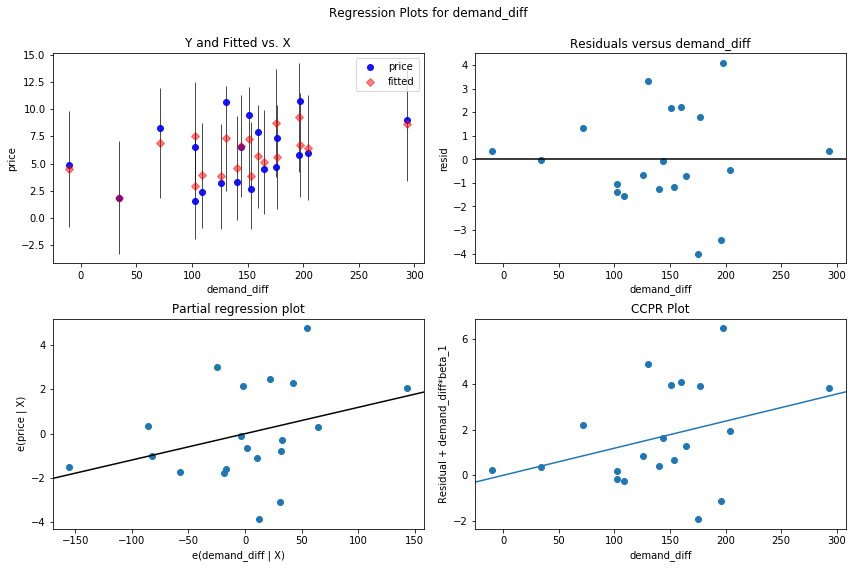

In [23]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(linear_model_diff2, 1, fig=fig)
plt.show()


## Bayesian Linear Regression for Gas Demand vs Price 

In [25]:
formula = 'price ~ demand'

In [26]:
with pm.Model() as normal_model:
    # Prior is sampled from a normal distribution.
    family = pm.glm.families.Normal()
    pm.GLM.from_formula(formula, data = world_gas_sdp_float, family = family)
    normal_trace = pm.sample(draws=20000, chains = 2, tune = 1500, njobs=-1, target_accept=0.9)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, demand, Intercept]
100%|██████████| 21500/21500 [01:45<00:00, 203.02it/s]
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.


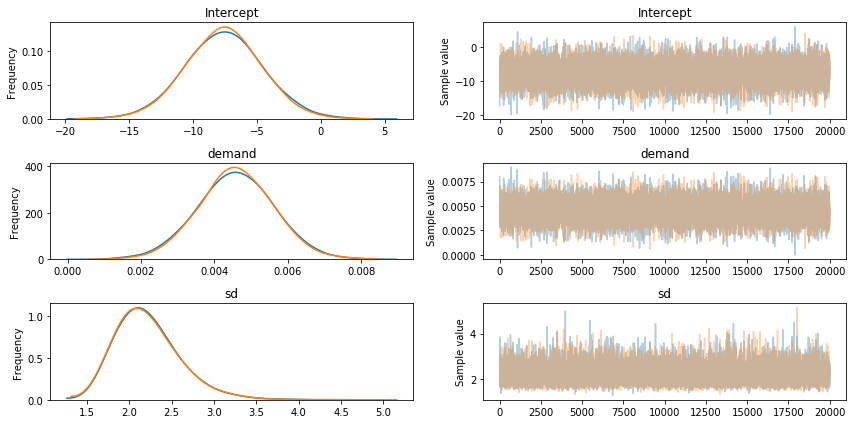

In [27]:
pm.traceplot(normal_trace)
plt.show()

In [32]:
# Make predictions for a new data point from the model trace
def query_model(trace, new_observation):
    
    # Print information about the new observation
    print('New Observation')
    print(new_observation)
    # Dictionary of all sampled values for each parameter
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
    # Standard deviation
    sd_value = var_dict['sd'].mean()
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Align weights and new observation
    var_weights = var_weights[new_observation.index]
    
    # Means of variables
    var_means = var_weights.mean(axis=0)
    # Mean for observation
    mean_loc = np.dot(var_means, new_observation)
    
    # Distribution of estimates
    estimates = np.random.normal(loc = mean_loc, scale = sd_value,
                                 size = 1000)
    return estimates


New Observation
Intercept       1
demand       3000
dtype: int64


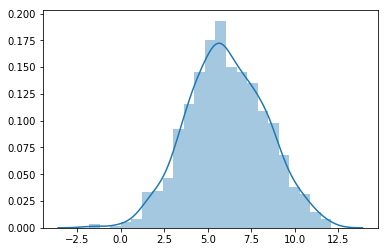

In [38]:
observation = pd.Series({'demand': 3000, 'Intercept':1})
returns = query_model(normal_trace, observation)

sns.distplot(returns)
plt.show()

Query model for new datapoints

## Bayesian Linear Regression for Two Period Lagged Demand

As we saw from the frequentist linear regression, a lagged demand of two periods reduces the autocorrelation significantly and allows us to model demand and price. We will now try to get predictions for the posterior distribution.

In [49]:
formula_diff_2 = 'price ~ demand_diff + year'

In [ ]:
with pm.Model() as normal_model:
    # Prior is sampled from a normal distribution.
    family = pm.glm.families.Normal()
    pm.GLM.from_formula(formula_diff_2, data = world_gas_demand_diff2, family = family)
    normal_trace_diff2 = pm.sample(draws=20000, chains = 2, tune = 1500, njobs=-1, target_accept=0.9)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, year, demand_diff, Intercept]
 55%|█████▌    | 11859/21500 [24:21<23:10,  6.93it/s]  

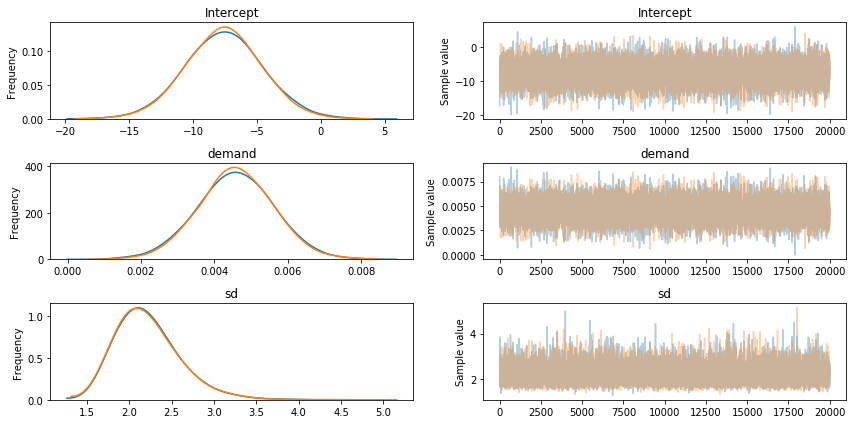

In [51]:
pm.traceplot(normal_trace_diff2)
plt.show()

New Observation
Intercept       1
demand       3000
dtype: int64


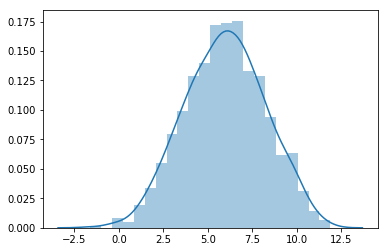

In [52]:
observation = pd.Series({'demand': 3000, 'Intercept':1})
returns = query_model(normal_trace, observation)

sns.distplot(returns)
plt.show()